# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [84]:
# Initial imports
import warnings
warnings.filterwarnings('ignore')
import os
from datetime import datetime, timedelta
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
import spacy
from collections import Counter
from spacy import displacy
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, reuters
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline
load_dotenv()

nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/torylbrown/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/torylbrown/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/torylbrown/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/torylbrown/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/torylbrown/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [40]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [41]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q='bitcoin',language='en',sort_by='relevancy',page_size=100)
bitcoin_headlines

{'status': 'ok',
 'totalResults': 9734,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment',
   'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…',
   'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a',
   'publishedAt': '2021-02-08T14:01:09Z',
   'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'},
  {'source': {'id': 'the-verge', 'name': 'T

In [42]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q='ethereum',language='en',sort_by='relevancy',page_size=100)
ethereum_headlines

{'status': 'ok',
 'totalResults': 1911,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
   'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
   'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
   'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
   'publishedAt': '2021-02-18T16:16:57Z',
   'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple 

In [6]:
def getSentimentScores(news_topic):
    
    news_topic_sentiments = []

    for article in news_topic["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            news_topic_sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass

    # Create DataFrame
    news_topic_df = pd.DataFrame(news_topic_sentiments)
    return news_topic_df

In [43]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_headlines_df = getSentimentScores(bitcoin_headlines)
bitcoin_headlines_df.head()

,text,date,compound,positive,negative,neutral
0,Elon Musks cryptocurrency hype was more than j...,2021-02-08,0.3182,0.091,0.000,0.909
1,"Tesla, led by Elon Musk, confirmed that it pur...",2021-02-09,0.3818,0.071,0.000,0.929
2,"For a brief moment on Sunday, before Tesla sai...",2021-02-09,-0.1027,0.000,0.038,0.962
3,Twitter and Square CEO Jack Dorsey and rapper ...,2021-02-12,0.2500,0.056,0.000,0.944
4,"Today in an SEC filing, Tesla disclosed that i...",2021-02-08,0.6597,0.137,0.000,0.863


In [44]:
# Create the Ethereum sentiment scores DataFrame
ethereum_headlines_df = getSentimentScores(ethereum_headlines)
ethereum_headlines_df.head()

,text,date,compound,positive,negative,neutral
0,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,-0.3400,0.063,0.119,0.818
1,Coinbase plans to go public by way of a direct...,2021-01-28,0.0000,0.000,0.000,1.000
2,FILE PHOTO: Representation of the Ethereum vir...,2021-02-04,0.0000,0.000,0.000,1.000
3,By Reuters Staff\r\nFILE PHOTO: Representation...,2021-02-03,0.0000,0.000,0.000,1.000
4,NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,0.4404,0.091,0.000,0.909


In [45]:
# Describe the Bitcoin Sentiment
bitcoin_headlines_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.156081,0.070309,0.030691,0.898979
std,0.405848,0.071840,0.059937,0.088153
min,-0.906200,0.000000,0.000000,0.599000
25%,0.000000,0.000000,0.000000,0.852500
50%,0.073000,0.066500,0.000000,0.923000
75%,0.466650,0.106750,0.053500,0.961000
max,0.921700,0.353000,0.326000,1.000000


In [46]:
# Describe the Ethereum Sentiment
ethereum_headlines_df.describe()

,compound,positive,negative,neutral
count,92.000000,92.000000,92.000000,92.000000
mean,0.174482,0.068772,0.026065,0.905163
std,0.395742,0.078717,0.048525,0.085563
min,-0.709600,0.000000,0.000000,0.667000
25%,0.000000,0.000000,0.000000,0.852000
50%,0.000000,0.051000,0.000000,0.915000
75%,0.526700,0.115250,0.015000,1.000000
max,0.900100,0.333000,0.175000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: The Bitcoin had the highest positive mean score.

Q: Which coin had the highest compound score?

A: The Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: The Bitcoin had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [47]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [48]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = list(set(stopwords.words('english')))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [104]:
# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Complete the tokenizer function
def tokenizer(text,type='list'):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lowercase_words = [word.lower() for word in root_words if word.lower() not in sw]
    
    # Remove the stop words
    tokens = [word.lower() for word in lowercase_words if word.lower() not in sw]
    
    if type.lower() == 'list':
        return tokens
    else:
        return ' '.join(tokens)

In [50]:
# Create a new tokens column for Bitcoin
bitcoin_token_list = []
for row in range(0,len(bitcoin_headlines_df)):
    text = bitcoin_headlines_df.iloc[row]['text']
    tokens = tokenizer(text)
    bitcoin_token_list.append(tokens)

bitcoin_headlines_df['tokens'] = bitcoin_token_list
bitcoin_headlines_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Elon Musks cryptocurrency hype was more than j...,2021-02-08,0.3182,0.091,0.000,0.909,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,"Tesla, led by Elon Musk, confirmed that it pur...",2021-02-09,0.3818,0.071,0.000,0.929,"[tesla, led, elon, musk, confirmed, purchased,..."
2,"For a brief moment on Sunday, before Tesla sai...",2021-02-09,-0.1027,0.000,0.038,0.962,"[brief, moment, sunday, tesla, said, invested,..."
3,Twitter and Square CEO Jack Dorsey and rapper ...,2021-02-12,0.2500,0.056,0.000,0.944,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,"Today in an SEC filing, Tesla disclosed that i...",2021-02-08,0.6597,0.137,0.000,0.863,"[today, sec, filing, tesla, disclosed, ha, acq..."


In [51]:
# Create a new tokens column for Ethereum
ethereum_token_list = []
for row in range(0,len(ethereum_headlines_df)):
    text = ethereum_headlines_df.iloc[row]['text']
    tokens = tokenizer(text)
    ethereum_token_list.append(tokens)

ethereum_headlines_df['tokens'] = ethereum_token_list
ethereum_headlines_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,Coinbase plans to go public by way of a direct...,2021-01-28,0.0000,0.000,0.000,1.000,"[coinbase, plan, go, public, way, direct, list..."
2,FILE PHOTO: Representation of the Ethereum vir...,2021-02-04,0.0000,0.000,0.000,1.000,"[file, photo, representation, ethereum, virtua..."
3,By Reuters Staff\r\nFILE PHOTO: Representation...,2021-02-03,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representation, et..."
4,NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,0.4404,0.091,0.000,0.909,"[nfts, nonfungible, token, scarce, digital, co..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [89]:
def get_headlines(keyword):
    all_headlines = []
    all_dates = []
    current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
    past_date = pd.Timestamp(datetime.now()- timedelta(10), tz="America/New_York").isoformat()
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1,
        )
        headlines = []
        for i in range(0, len(articles["articles"])):
            headlines.append(articles["articles"][i]["title"])
        all_headlines.append(headlines)
        all_dates.append(date)
        date = date - timedelta(days=1)
    return all_headlines, all_dates

In [90]:

btc_headlins,btc_dates = get_headlines('bitcoin')

Fetching news about 'bitcoin'
******************************
retrieving news from: 2021-03-01 00:00:00
retrieving news from: 2021-02-28 00:00:00
retrieving news from: 2021-02-27 00:00:00
retrieving news from: 2021-02-26 00:00:00
retrieving news from: 2021-02-25 00:00:00
retrieving news from: 2021-02-24 00:00:00
retrieving news from: 2021-02-23 00:00:00
retrieving news from: 2021-02-22 00:00:00
retrieving news from: 2021-02-21 00:00:00
retrieving news from: 2021-02-20 00:00:00


In [92]:
btc_string = tokenizer(btc_headlins)
btc_string

['microstrategy',
 'bitcoin',
 'holding',
 'valued',
 'billion',
 'latest',
 'buy',
 'reuters',
 'update',
 'bitcoin',
 'tipping',
 'point',
 'citi',
 'say',
 'reuters',
 'bitcoin',
 'tipping',
 'point',
 'citi',
 'say',
 'reuters',
 'exclusive',
 'goldman',
 'sachs',
 'restarts',
 'cryptocurrency',
 'desk',
 'amid',
 'bitcoin',
 'boom',
 'reuters',
 'forexrisk',
 'currency',
 'bitcoin',
 'recover',
 'yield',
 'steady',
 'reuters',
 'chinas',
 'furtive',
 'bitcoin',
 'trade',
 'heat',
 'worrying',
 'regulator',
 'reuters',
 'big',
 'short',
 'investor',
 'michael',
 'burry',
 'slam',
 'bitcoin',
 'speculative',
 'bubble',
 'warns',
 'crash',
 'coming',
 'citi',
 'say',
 'bitcoin',
 'could',
 'become',
 'currency',
 'global',
 'trade',
 'massive',
 'transformation',
 'could',
 'implode',
 'google',
 'finance',
 'adds',
 'tab',
 'bitcoin',
 'ether',
 'litecoin',
 'goldman',
 'sachs',
 'restarts',
 'cryptocurrency',
 'desk',
 'begin',
 'dealing',
 'bitcoin',
 'futures',
 'investor',
 'pau

In [121]:
# Generate the Bitcoin N-grams where N=2

btc_counts = Counter(ngrams(btc_string, n=2))
btc_counts

Counter({('microstrategy', 'bitcoin'): 1,
         ('bitcoin', 'holding'): 1,
         ('holding', 'valued'): 1,
         ('valued', 'billion'): 1,
         ('billion', 'latest'): 1,
         ('latest', 'buy'): 1,
         ('buy', 'reuters'): 1,
         ('reuters', 'update'): 1,
         ('update', 'bitcoin'): 1,
         ('bitcoin', 'tipping'): 2,
         ('tipping', 'point'): 2,
         ('point', 'citi'): 2,
         ('citi', 'say'): 3,
         ('say', 'reuters'): 2,
         ('reuters', 'bitcoin'): 12,
         ('reuters', 'exclusive'): 1,
         ('exclusive', 'goldman'): 1,
         ('goldman', 'sachs'): 3,
         ('sachs', 'restarts'): 2,
         ('restarts', 'cryptocurrency'): 2,
         ('cryptocurrency', 'desk'): 2,
         ('desk', 'amid'): 2,
         ('amid', 'bitcoin'): 1,
         ('bitcoin', 'boom'): 1,
         ('boom', 'reuters'): 1,
         ('reuters', 'forexrisk'): 1,
         ('forexrisk', 'currency'): 1,
         ('currency', 'bitcoin'): 1,
         ('bi

In [96]:
# Generate the Ethereum N-grams where N=2
eth_headlins,eth_dates = get_headlines('ethereum')

Fetching news about 'ethereum'
******************************
retrieving news from: 2021-03-01 00:00:00
retrieving news from: 2021-02-28 00:00:00
retrieving news from: 2021-02-27 00:00:00
retrieving news from: 2021-02-26 00:00:00
retrieving news from: 2021-02-25 00:00:00
retrieving news from: 2021-02-24 00:00:00
retrieving news from: 2021-02-23 00:00:00
retrieving news from: 2021-02-22 00:00:00
retrieving news from: 2021-02-21 00:00:00
retrieving news from: 2021-02-20 00:00:00


In [97]:
eth_string = tokenizer(eth_headlins)

In [98]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [101]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = token_count(btc_string,10)
#print(dict(bigram_counts.most_common(10)))
btc_tokens

[('bitcoin', 111),
 ('reuters', 52),
 ('crypto', 21),
 ('high', 15),
 ('billion', 13),
 ('elon', 13),
 ('musk', 13),
 ('say', 12),
 ('market', 12),
 ('hit', 11)]

In [102]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = token_count(eth_string,10)
eth_tokens

[('bitcoin', 62),
 ('ethereum', 59),
 ('crypto', 25),
 ('price', 23),
 ('high', 22),
 ('cryptocurrency', 17),
 ('musk', 14),
 ('defi', 12),
 ('february', 12),
 ('blockchain', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

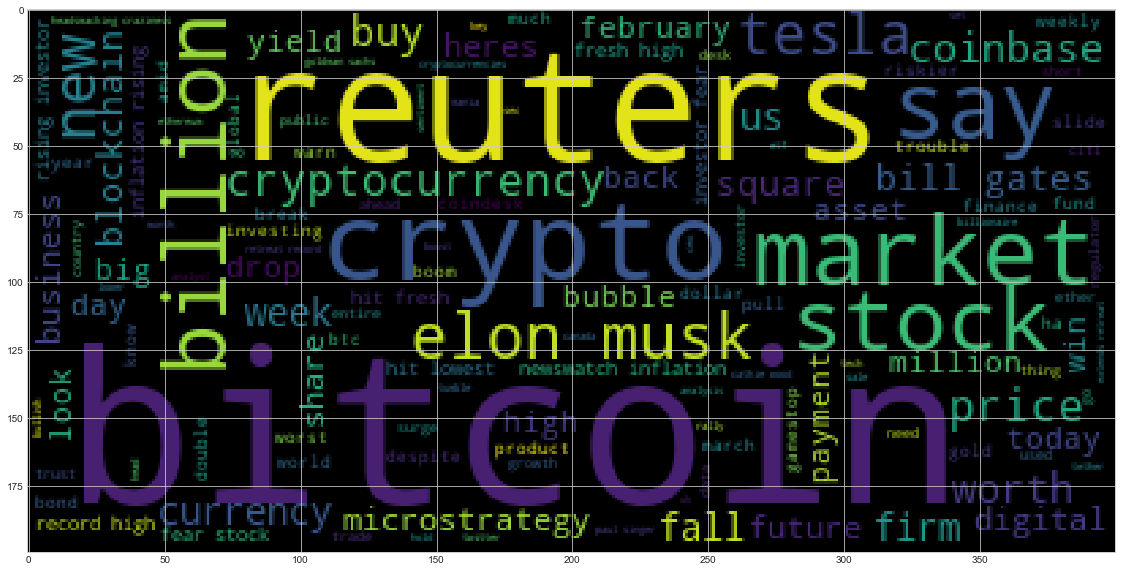

In [106]:
# Generate the Bitcoin word cloud
btc_input_text = tokenizer(btc_headlins,'string')
wc = WordCloud().generate(btc_input_text)
plt.imshow(wc)

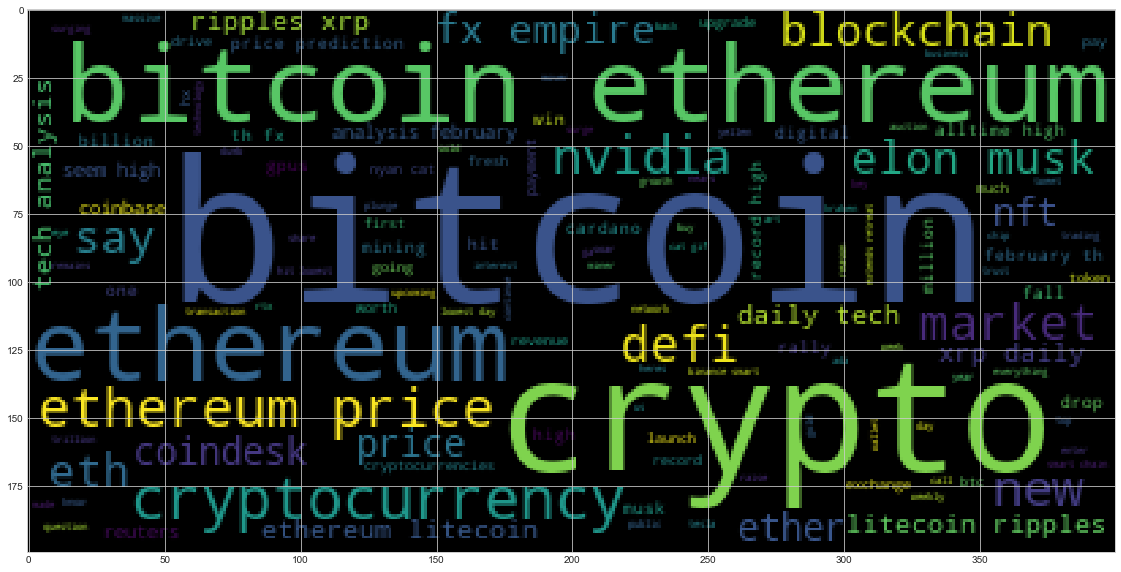

In [107]:
# Generate the Ethereum word cloud
eth_input_text = tokenizer(eth_headlins,'string')
eth_wc = WordCloud().generate(eth_input_text)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [108]:
# Concatenate all of the Bitcoin text together
btc_input_text

'microstrategy bitcoin holding valued billion latest buy reuters update bitcoin tipping point citi say reuters bitcoin tipping point citi say reuters exclusive goldman sachs restarts cryptocurrency desk amid bitcoin boom reuters forexrisk currency bitcoin recover yield steady reuters chinas furtive bitcoin trade heat worrying regulator reuters big short investor michael burry slam bitcoin speculative bubble warns crash coming citi say bitcoin could become currency global trade massive transformation could implode google finance adds tab bitcoin ether litecoin goldman sachs restarts cryptocurrency desk begin dealing bitcoin futures investor paul singer warned headsmacking craziness market said could trouble ahead investor paul singer warned headsmacking craziness market said could trouble ahead bitcoin worth thing need know opening bell bill gates elon musk warn dont go far crypto speculation chinas inner mongolia end cryptocurrency mining ban new steel coke project reuters heres chance

In [114]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_input_text)

# Add a title to the document
displacy.render(btc_doc, style='ent')

In [30]:
# Render the visualization
# YOUR CODE HERE!

In [116]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['billion',
 'next week',
 'weekly',
 'year',
 'first year',
 'today',
 'million',
 'thursday',
 'three weeks',
 'month',
 'billion',
 'today',
 'weekly',
 'weekend',
 'dip week',
 'etsy',
 'two week',
 'billion',
 'billion',
 'million',
 'last two month',
 'weekly',
 'eth',
 'five',
 'business week',
 'today',
 'billion',
 'one day',
 'daily',
 'wednesday',
 'today',
 'daily',
 'year',
 'billion',
 'one day',
 'million',
 'million',
 'weekend',
 'weekly',
 'billion',
 'billion',
 'first',
 'today',
 'india',
 'billion',
 'warren',
 'year']

---

### Ethereum NER

In [119]:
# Concatenate all of the Ethereum text together
eth_input_text

'bitcoin rise reuters africa bitcoin worth win bitcoin ethereum heres chance win k investment crypto donating charity ethereum rival cardano braced big week amid massive price rally crypto markets plunge billion coinbase reveals major bitcoin ethereum price risks ethereum litecoin ripples xrp daily tech analysis march st fx empire coinbase kraken gemini crypto exchanges must embrace defi capture growth apple processor manages mine ethereum ethereum defi forcing smart contract platform evolve btcs drives nearterm revenue growth expanding ethereum staking operation nodes top price prediction bitcoin ethereum ripple ethereum threshold upswing antier solutions geared launch worlds first defi wallet supporting ethereum tron binance smart chain dapps cardanos ada token tripled february outperform coindesk hive blockchain surpasses bitcoin mining capacity goal phs new level phs ehs goldman sachs launch crypto trading operation month bitcoins big surge bitcoin poised massive transformation mai

In [117]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_input_text)

# Add a title to the document
displacy.render(eth_doc, style='ent')

In [34]:
# Render the visualization
# YOUR CODE HERE!

In [118]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['billion',
 'daily',
 'first',
 'thousand',
 'daily',
 'one',
 'daily',
 'soar hour',
 'thousand',
 'six million',
 'daily',
 'soar hour',
 'roughly billion',
 'eth',
 'million',
 'today',
 'today',
 'first',
 'eth',
 'daily',
 'daily',
 'one',
 'eth',
 'year',
 'billion',
 'one day',
 'million',
 'days',
 'eth',
 'daily',
 'one',
 'weekly',
 'million',
 'weekly',
 'weekend',
 'weekly',
 'daily',
 'first',
 'eth',
 'month',
 'one',
 'billion',
 'eth',
 'daily',
 'february',
 'one',
 'four',
 'india',
 'daily',
 'first',
 'two nyc']

---